# Linear and Logistic Regression
- **100 points**

### Instructions
- you cannot use any other library.Write the code from scratch.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary.
- link for the datasets - https://drive.google.com/drive/folders/1MXmIChMxodGbEpowyVJBFLdvaDpj23gd?usp=sharing


## Question 1 (50 points)

## Linear Regression

In this section, we'll implement a linear regression model that can learn to predict a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

In [333]:
# Importing Libraries
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preparation.
To keep things simple, first we'll use a toy dataset to test our implementation. This dataset contains the heights and weights of a few individuals. Our goal is to predict the weight of an individual given their height using a linear regression model.

In [334]:
df = pd.read_csv('heights.csv')

In [335]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


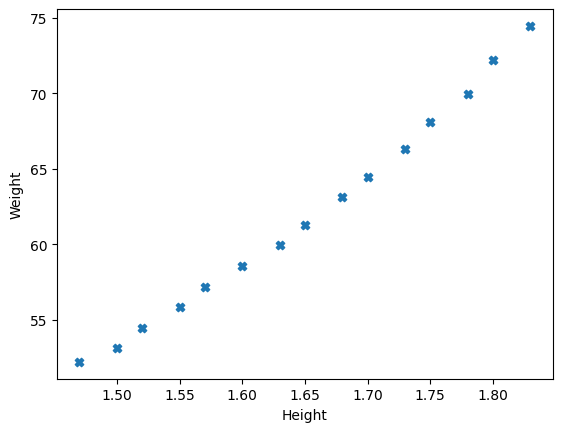

In [336]:
import matplotlib.pyplot as plt

plt.scatter(df['Height'], df['Weight'], marker='X')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

Looking at the distribution of the data, it seems like `Weight` and `Height` have a linear relationship. Hence, a linear regression model should be able to capture this relationship.  

Let's us convert the dataframe `df` to a Numpy array so that it is easier to perform operations on it.

In [337]:
X_train = np.array(df['Height'])
y_train = np.array(df['Weight'])
X_train = np.expand_dims(X_train, -1)

### (30 points) Implement the ` LinearRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [338]:
class LinearRegression:
    def __init__(self, lr=0.001, epochs=30):
        """
        Fits a linear regression model on a given dataset.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.epochs = epochs
        ######################
        #   YOUR CODE HERE   #
        ######################
        # You may add additional fields
        self.weights = None
        self.bias = 0
        
    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        n_samples,n_features=X.shape
        if(n_features == 1):
            self.weights=np.zeros(1)
        else:
            self.weights=np.zeros((n_features,1))
        self.bias= 0
        for i in range(self.epochs):
            self.update_weights(X,y)


    def update_weights(self, X, y):
        """
        Helper function to calculate the gradients and update weights using batch gradient descent.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        n_samples = X.shape[0]
        y_pred = np.dot(X,self.weights) + self.bias
        dw=(1/n_samples)*(np.dot(X.T,y_pred-y))
        db=(1/n_samples)*(np.sum(y_pred-y))

        self.weights=self.weights-dw*self.lr
        self.bias=self.bias-self.lr*db
        

    def predict(self, X):
        """
        Predict values using the weights.

        Args:
            X: features

        Returns:
            The predicted value.
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        if self.weights is None or self.bias is None:
            raise ValueError("Model is not trained yet. Please call `train` method before `predict`.")
        return np.dot(X,self.weights)+self.bias


### Build the model and train on the dataset.

In [339]:
model = LinearRegression(0.01, 100000)
model.train(X_train, y_train)

### (5 points) Implement the evaluation metric `mean squared error`.
We use the [mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) as the metric to evaluate our model.

In [340]:
def mean_squared_error(y_pred, y_actual):
    """
    Calculates the mean squared error between two vectors.

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The mean squared error.
    """
    ######################
    #   YOUR CODE HERE   #
    ######################
    return np.sum((y_pred-y_actual)**2)/len(y_pred)



### Make predictions using the model and evaluate it.

In [341]:
y_pred = model.predict(X_train)
print("Train MSE: {:.4f}".format(mean_squared_error(y_pred, y_train)))

Train MSE: 0.5197


### Plot the predicted and the actual values.

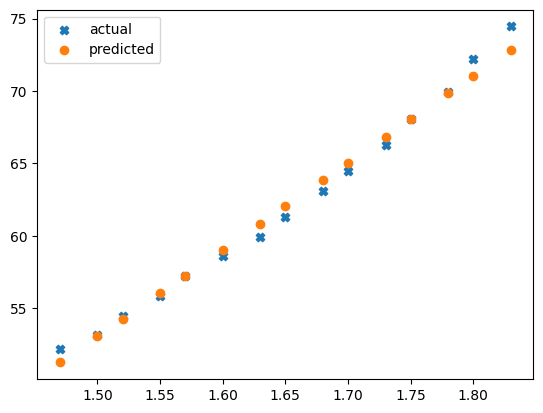

In [342]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='X', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.legend()
plt.show()

### Multiple linear regression for sales prediction

Next we use our linear regression model to learn the relationship between sales and advertising budget for a product. The `advertise.csv` dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio, and newspaper. The sales are in thousands of units and the budget is in thousands of dollars.  

We will train a linear regression model to predict the sales of the product given the TV, radio, and newspaper ad budgets.

In [343]:
df = pd.read_csv('advertise.csv')

In [344]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [345]:
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df[['Sales']])

### (5 points) Normalize the features in your dataset.

Gradient descent-based models can be sensitive to different scales of the features/independent variables. Hence, it is important to normalize them. You may use the functions, `dataset_minmax`, `normalize_dataset`, and `unnormalize_dataset`, provided in the code block below to perform [min-max normalization](https://en.wikipedia.org/wiki/Feature_scaling) on the features.

In [346]:
def dataset_minmax(dataset):
    """
    Finds the min and max values for each column.
    """
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

def normalize_dataset(dataset, minmax):
    """
    Rescales dataset columns to the range 0-1.
    """
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
    return dataset

def unnormalize_dataset(dataset, minmax):
    """
    Rescales dataset columns to their original values.
    """
    for row in dataset:
        for i in range(len(row)):
            row[i] = minmax[i][0] + (minmax[i][1] - minmax[i][0]) * row[i]
    return dataset

In [347]:
######################
#   YOUR CODE HERE   #
######################
minmax1=dataset_minmax(X)
minmax2=dataset_minmax(y)
X=normalize_dataset(X,minmax1)
y=normalize_dataset(y,minmax2)

### Split the data into train and test set.

In [348]:
def split_indices(n, test_frac, seed):
    """
    Provides indices for creating training and test set.
    """
    # Determine the size of the test set
    n_test = int(test_frac * n)
    np.random.seed(seed)
    # Create random permutation between 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_test indices for test set
    return idxs[n_test:], idxs[:n_test]

In [349]:
test_frac = 0.2 ## Set the fraction for the test set
rand_seed = 42 ## Set the random seed

train_indices, test_indices = split_indices(df.shape[0], test_frac, rand_seed)
print("#samples in training set: {}".format(len(train_indices)))
print("#samples in test set: {}".format(len(test_indices)))

#samples in training set: 160
#samples in test set: 40


In [350]:
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]
# print(X_train)
# print(y_train)


[[0.38992222 0.15524194 0.2005277 ]
 [0.59621238 0.1875     0.05364996]
 [0.14338857 0.53830645 0.3060686 ]
 [0.20831924 0.25403226 0.15831135]
 [0.75515725 0.0483871  0.13456464]
 [0.12681772 0.07459677 0.11873351]
 [0.23638823 0.32258065 0.35620053]
 [0.49577274 0.48185484 0.16534741]
 [0.35136963 0.11491935 0.29991205]
 [0.25566452 0.55443548 0.13808267]
 [0.26208996 0.94354839 0.30079156]
 [0.56712885 0.14314516 0.10993843]
 [0.02705445 0.9858871  0.65699208]
 [0.02401082 0.78427419 0.44239226]
 [0.25600271 0.01612903 0.12752858]
 [0.43523842 0.11491935 0.27264732]
 [0.24585729 0.34274194 0.11081794]
 [0.9773419  0.85282258 0.44766931]
 [0.06391613 0.40524194 0.14687775]
 [0.66587758 0.07056452 0.04925242]
 [0.95908015 0.21370968 0.05364996]
 [0.62292864 0.4233871  0.19085312]
 [0.37943862 0.35080645 0.33685136]
 [0.07811972 0.70766129 0.5769569 ]
 [0.98072371 0.08266129 0.07211961]
 [0.06323977 0.32258065 0.19349164]
 [0.99053094 0.55846774 0.01319261]
 [0.06087251 0.24395161 0.20

### Build the model and train on the dataset.

In [351]:
model = LinearRegression(0.01, 100000)
model.train(X_train, y_train)

### (10 points) Evaluation on training and test set.
If you have implemented `LinearRegression` correctly, the **test MSE** should be < 3.

In [352]:
print("Training MSE: {:.4f}".format(mean_squared_error(model.predict(X_train), y_train)))
print("Test MSE: {:.4f}".format(mean_squared_error(model.predict(X_test), y_test)))

Training MSE: 0.0041
Test MSE: 0.0045


# Using Closed Form Solution(75)


* For both the above 2 models you need to try out the closed form solutions
* The more efforts you put in, the more marks you get.
* It is open ended

In [353]:
###########################
### Write your code here###
###########################
class LinearRegressionClosedForm:
    def __init__(self):
        """
        Fits a linear regression model using the closed-form solution (normal equation).
        """
        self.weights = None
        self.bias = 0

    def train(self, X, y):
        """
        Compute the weights using the closed-form solution.

        Args:
            X: features (numpy array of shape [n_samples, n_features])
            y: target (numpy array of shape [n_samples, 1])
        """
        # Add a column of ones to X to include the bias term
        X_b = np.hstack([np.ones((X.shape[0], 1)), X])
        
        # Closed-form solution (normal equation)
        X_b_T = X_b.T
        self.weights = np.linalg.inv(X_b_T.dot(X_b)).dot(X_b_T).dot(y)

    def predict(self, X):
        """
        Predict values using the weights.

        Args:
            X: features (numpy array of shape [n_samples, n_features])

        Returns:
            The predicted values (numpy array of shape [n_samples, 1]).
        """
        # Add a column of ones to X to include the bias term
        X_b = np.hstack([np.ones((X.shape[0], 1)), X])
        return np.dot(X_b,self.weights)

In [354]:
df = pd.read_csv('heights.csv')

In [355]:
X_train1 = np.array(df['Height'])
y_train1 = np.array(df['Weight'])
X_train1 = np.expand_dims(X_train1, -1)

In [356]:
model = LinearRegressionClosedForm()
model.train(X_train1, y_train1)

In [357]:
y_pred1 = model.predict(X_train1)
print("Train MSE: {:.4f}".format(mean_squared_error(y_pred1, y_train1)))

Train MSE: 0.4994


In [358]:
X_train2 = X[train_indices]
y_train2 = y[train_indices]
X_test2 = X[test_indices]
y_test2 = y[test_indices]
# print(X_train2)
# print(y_train2)

[[0.38992222 0.15524194 0.2005277 ]
 [0.59621238 0.1875     0.05364996]
 [0.14338857 0.53830645 0.3060686 ]
 [0.20831924 0.25403226 0.15831135]
 [0.75515725 0.0483871  0.13456464]
 [0.12681772 0.07459677 0.11873351]
 [0.23638823 0.32258065 0.35620053]
 [0.49577274 0.48185484 0.16534741]
 [0.35136963 0.11491935 0.29991205]
 [0.25566452 0.55443548 0.13808267]
 [0.26208996 0.94354839 0.30079156]
 [0.56712885 0.14314516 0.10993843]
 [0.02705445 0.9858871  0.65699208]
 [0.02401082 0.78427419 0.44239226]
 [0.25600271 0.01612903 0.12752858]
 [0.43523842 0.11491935 0.27264732]
 [0.24585729 0.34274194 0.11081794]
 [0.9773419  0.85282258 0.44766931]
 [0.06391613 0.40524194 0.14687775]
 [0.66587758 0.07056452 0.04925242]
 [0.95908015 0.21370968 0.05364996]
 [0.62292864 0.4233871  0.19085312]
 [0.37943862 0.35080645 0.33685136]
 [0.07811972 0.70766129 0.5769569 ]
 [0.98072371 0.08266129 0.07211961]
 [0.06323977 0.32258065 0.19349164]
 [0.99053094 0.55846774 0.01319261]
 [0.06087251 0.24395161 0.20

In [359]:
model2 = LinearRegressionClosedForm()
model2.train(X_train2, y_train2)
# print(model2.weights)

[[0.12415685]
 [0.63458234]
 [0.19712165]
 [0.01941247]]


In [360]:
print("Training MSE: {:.4f}".format(mean_squared_error(model2.predict(X_train2), y_train2)))
print("Test MSE: {:.4f}".format(mean_squared_error(model2.predict(X_test2), y_test2)))

Training MSE: 0.0041
Test MSE: 0.0045


## Question 2 (50 points)

## Logistic Regression

In this section, we'll implement a logistic regression model that can learn to predict the class/label of a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

### Data Preparation
Once again, to keep things simple, first we'll use the heights and weights dataset to test our implementation. Let's divide the weights into 2 categories: 0 if the weight is < 60 and 1 otherwise. Our goal is to predict the weight category of an individual given their height using a logistic regression model.

In [361]:
df = pd.read_csv('heights.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [362]:
X_train = np.array(df['Height'])
y_train = np.array((df['Weight'] >= 60).astype('float'))
X_train = np.expand_dims(X_train, -1)

### (30 points) Implement the ` LogisticRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [363]:
class LogisticRegression():
    def __init__(self,lr,epoch):
        self.w = None
        self.lr=lr
        self.epoch=epoch
    
    def train(self,x,y):
        # Create a column of ones (shape: m x 1)
        ones_column = np.ones((x.shape[0], 1))
        # Concatenate the column of ones with the original array
        x = np.hstack((ones_column, x))
        y = y.reshape((x.shape[0], 1))
        self.w = np.random.randn(x.shape[1],1)
        for i in range(self.epoch):
            self.update_weights(x,y)
    
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))

    def update_weights(self,x,y):
        z=np.dot(x,self.w)
        a=self.sigmoid(z)

        dw = np.dot(x.T,(a-y))

        self.w=self.w-(self.lr*dw)

    def predict(self,x):
        ones_column = np.ones((x.shape[0], 1))
        x = np.hstack((ones_column, x))
        z=np.dot(x,self.w)
        a=self.sigmoid(z)
        return a

### Build the model and train on the dataset.

In [364]:
model=LogisticRegression(0.01,10000)
model.train(X_train,y_train)

### (5 points) Implement the evaluation metric `accuracy`.
We use the [accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy) as the metric to evaluate our model.

In [365]:
def accuracy(y_pred, y_actual):
    """
    Calculates the accuracy of the predictions (binary values).

    Args:
        y_pred: predicted probabilities
        y_actual: actual/true values

    Returns:
        The accuracy.
    """
    # Convert probabilities to binary predictions
    y_pred_binary = (y_pred >= 0.5).astype(int)
    # Calculate accuracy
    correct_predictions = len(np.where(y_pred_binary.flatten() == y_actual)[0])
    accuracy = correct_predictions / len(y_actual)
    
    return accuracy

### Make predictions using the model and evaluate it.

In [366]:
y_pred_probs = model.predict(X_train)
y_pred = (y_pred_probs >= 0.5).astype('float')
print("Train Accuracy: {}".format(accuracy(y_pred, y_train)))

Train Accuracy: 1.0


### Plot the predicted and the actual values.

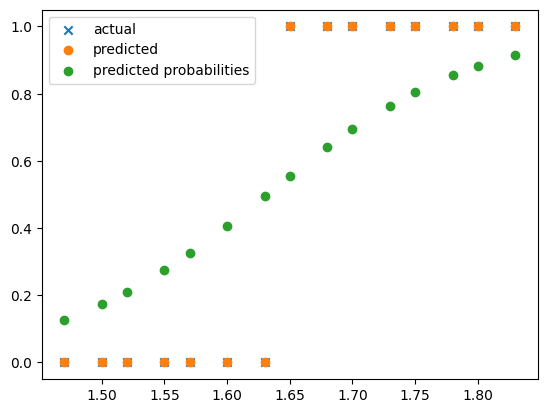

In [367]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='x', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.scatter(X_train, y_pred_probs, marker='o', label='predicted probabilities')
plt.legend()
plt.show()

# ** Use the Newton Raphson Method for the same** (75 marks)


In [368]:
#####################
#   YOUR CODE HERE   #
######################
class LogisticRegressionNewtonRaphson:
    def __init__(self,epoch):
        self.w=None
        self.epoch=epoch

    def sigmoid(self,z):
        return 1/(1+np.exp(-z))

    def train(self,x,y):
        ones_column = np.ones((x.shape[0], 1))
        # Concatenate the column of ones with the original array
        x = np.hstack((ones_column, x))
        y = y.reshape((x.shape[0], 1))
        self.w = np.random.randn(x.shape[1],1)
        for i in range(self.epoch):
            self.update_weights(x,y)

    def update_weights(self,x,y):
        y_pred=self.sigmoid(np.dot(x,self.w))
        p=np.dot(y_pred.T,(y_pred-1))
        hessian= np.dot((x.T)*p,x)
        gradient=np.dot(x.T,y-y_pred)
        self.w-=np.linalg.solve(hessian,gradient)

    def predict(self,x):
        ones_column = np.ones((x.shape[0], 1))
        # Concatenate the column of ones with the original array
        x = np.hstack((ones_column, x))
        y_pred=np.dot(x,self.w)
        return y_pred

In [369]:
#####################
#   YOUR CODE HERE   #
######################
model = LogisticRegressionNewtonRaphson(100)
model.train(X_train, y_train)

In [370]:
#####################
#   YOUR CODE HERE   #
######################
y_pred_probs = model.predict(X_train)
y_pred = (y_pred_probs >= 0.5).astype('float')
print("Train Accuracy: {}".format(accuracy(y_pred, y_train)))

Train Accuracy: 0.9333333333333333


# K Means Clustering(100 marks)



In [371]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the two Gaussians
mu1 = np.array([3, 3])
Sigma1 = np.array([[1, 0], [0, 2]])

mu2 = np.array([1, -3])
Sigma2 = np.array([[2, 0], [0, 1]])

mu3 = np.array([-10, 8])
Sigma3 = np.array([[2, 0], [0, 2]])



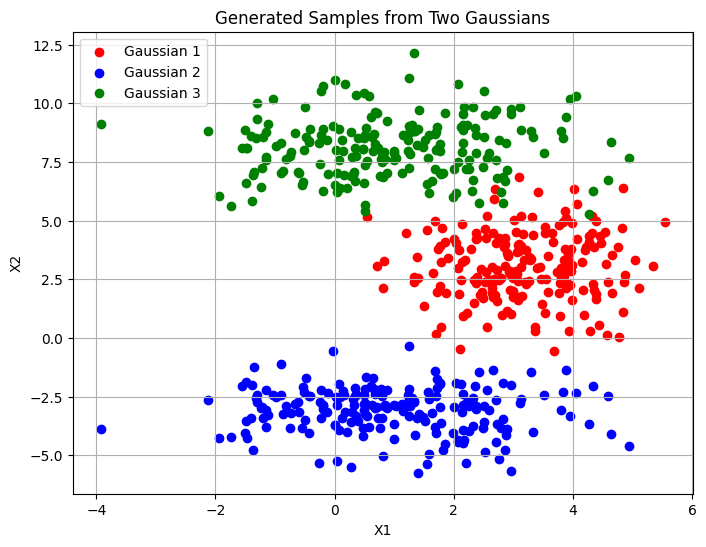

In [372]:
n_samples = 200
samples1 = np.random.multivariate_normal(mu1, Sigma1, n_samples)
samples2 = np.random.multivariate_normal(mu2, Sigma2, n_samples)
samples3 = np.random.multivariate_normal(mu3, Sigma3, n_samples)

# Plot the generated samples
plt.figure(figsize=(8, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], c='red', label='Gaussian 1')
plt.scatter(samples2[:, 0], samples2[:, 1], c='blue', label='Gaussian 2')
plt.scatter(samples2[:, 0], samples3[:, 1], c='green', label='Gaussian 3')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated Samples from Two Gaussians')
plt.legend()
plt.grid(True)
plt.show()

The above is the dataset generated from 3 gaussians, and a visualizations for the same, You need to assume that you have the data and then you use k means for the same your output should be similar to what is shown above

In [373]:
#####################
#   YOUR CODE HERE   #
######################
import random

class KmeansClustering():
    def __init__(self,n_clusters=3,max_iter=100):
        self.n_clusters=n_clusters
        self.max_iter=max_iter
        self.centroids=None

    def fit_predict(self,x):
        random_index=random.sample(range(0,x.shape[0]),self.n_clusters)
        self.centroids=x[random_index]
        for i in range(self.max_iter):
            cluster_group=self.assign_cluster(x)
            old_centroids=self.centroids
            self.centroids=self.move_centroids(x,cluster_group)
            if np.array_equal(old_centroids, self.centroids):
                break

        return cluster_group

    def dist(self,x,centroid):
        return np.sqrt(np.dot(x-centroid,x-centroid))  

    def assign_cluster(self,x):
        cluster_group=[]
        for row in x:
            distances=[]
            for centroid in self.centroids:
                distances.append(self.dist(row,centroid))
            index_pos=distances.index(min(distances))
            cluster_group.append(index_pos)

        return np.array(cluster_group)

    def move_centroids(self,x,cluster_group):
        new_centroids=[]
        for type in np.unique(cluster_group):
            new_centroids.append(x[cluster_group==type].mean(axis=0))
        return new_centroids


In [374]:
# Combine the samples into one dataset
X = np.vstack((samples1, samples2, samples3))
kmeans = KmeansClustering()
cluster_group=kmeans.fit_predict(X)

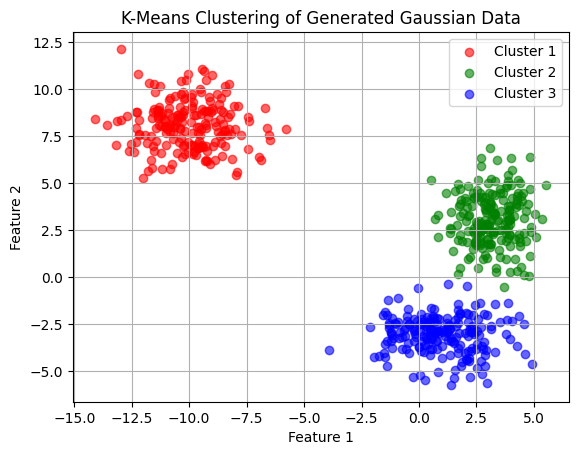

In [375]:
colors = ['r', 'g', 'b']

for i in range(3):
    cluster_points = X[cluster_group == i]
    plt.scatter(cluster_points[:, 0],cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}', alpha=0.6)

plt.title('K-Means Clustering of Generated Gaussian Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()